# 有限要素法のためのPython入門

## はじめに

PythonにはNumpy/matplotlib/Scipy/Getfem++などのライブラリがあり、それらを組み合わせることにより容易に有限要素法のスクリプトを組むことができます。それぞれのライブラリに関しては各Wikipediaの内容を確認してください。

Numpy (https://ja.wikipedia.org/wiki/NumPy)

matplotlib(https://ja.wikipedia.org/wiki/Matplotlib)

Scipy (https://ja.wikipedia.org/wiki/SciPy)

Getfem++ (https://ja.wikipedia.org/wiki/Getfem%2B%2B)

それぞれのモジュールはPythonでは以下のように呼び出します。

In [1]:
import numpy as np
import scipy as sp
import getfem as gf
import matplotlib.pyplot as plt
%matplotlib inline

## Numpyの学習

本節ではNumpyのチュートリアル

https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

の内容を解説します。

In [2]:
a = np.arange(15).reshape(3, 5)

In [3]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [4]:
a.shape

(3, 5)

In [5]:
a.ndim

2

In [6]:
a.dtype.name

'int32'

In [7]:
a.itemsize

4

In [8]:
a.size

15

In [9]:
type(a)

numpy.ndarray

In [10]:
b = np.array([6, 7, 8])

In [11]:
b

array([6, 7, 8])

In [12]:
type(b)

numpy.ndarray

In [13]:
a = np.array([2,3,4])

In [14]:
a

array([2, 3, 4])

In [15]:
a.dtype

dtype('int32')

In [16]:
b = np.array([1.2, 3.5, 5.1])

In [17]:
b.dtype

dtype('float64')

In [18]:
a = np.array([1,2,3,4])  # RIGH

In [19]:
b = np.array([(1.5,2,3), (4,5,6)])
b


array([[ 1.5,  2. ,  3. ],
       [ 4. ,  5. ,  6. ]])

In [20]:
c = np.array( [ [1,2], [3,4] ], dtype=complex )
c


array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

In [21]:
np.zeros( (3,4) )
np.ones( (2,3,4), dtype=np.int16 )                # dtype can also be specified
np.empty( (2,3) )                                 # uninitialized, output may vary

array([[  1.39069238e-309,   1.39069238e-309,   1.39069238e-309],
       [  1.39069238e-309,   1.39069238e-309,   1.39069238e-309]])

In [22]:
np.arange( 10, 30, 5 )
np.arange( 0, 2, 0.3 )                 # it accepts float arguments

array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8])

In [23]:
from numpy import pi
np.linspace( 0, 2, 9 )                 # 9 numbers from 0 to 2

x = np.linspace( 0, 2*pi, 100 )        # useful to evaluate function at lots of points
f = np.sin(x)

In [24]:
a = np.arange(6)                         # 1d array
print(a)

b = np.arange(12).reshape(4,3)           # 2d array
print(b)

c = np.arange(24).reshape(2,3,4)         # 3d array
print(c)

[0 1 2 3 4 5]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [25]:
print(np.arange(10000))

print(np.arange(10000).reshape(100,100))


[   0    1    2 ..., 9997 9998 9999]
[[   0    1    2 ...,   97   98   99]
 [ 100  101  102 ...,  197  198  199]
 [ 200  201  202 ...,  297  298  299]
 ..., 
 [9700 9701 9702 ..., 9797 9798 9799]
 [9800 9801 9802 ..., 9897 9898 9899]
 [9900 9901 9902 ..., 9997 9998 9999]]


In [26]:
np.set_printoptions(threshold='nan')

In [27]:
a = np.array( [20,30,40,50] )


In [28]:
b = np.arange( 4 )
b


array([0, 1, 2, 3])

In [29]:
c = a-b
c

array([20, 29, 38, 47])

In [30]:
b**2

array([0, 1, 4, 9])

In [31]:
10*np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [32]:
a<35

array([ True,  True, False, False], dtype=bool)

In [33]:
A = np.array( [[1,1],
            [0,1]] )
B = np.array( [[2,0],
            [3,4]] )

In [34]:
A*B                         # elementwise product

array([[2, 0],
       [0, 4]])

In [35]:
A.dot(B)                    # matrix product

array([[5, 4],
       [3, 4]])

In [36]:
np.dot(A, B)                # another matrix product

array([[5, 4],
       [3, 4]])

In [37]:
a = np.ones((2,3), dtype=int)
b = np.random.random((2,3))
a *= 3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [38]:
b += a
b

array([[ 3.20037758,  3.16173544,  3.09706154],
       [ 3.68670453,  3.57226996,  3.08414856]])

In [39]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0,pi,3)
b.dtype.name

'float64'

In [40]:
c = a+b
c

array([ 1.        ,  2.57079633,  4.14159265])

In [41]:
c.dtype.name

'float64'

In [42]:
d = np.exp(c*1j)
d

array([ 0.54030231+0.84147098j, -0.84147098+0.54030231j,
       -0.54030231-0.84147098j])

In [43]:
d.dtype.name

'complex128'

In [44]:
import numpy as np
a = np.array([[1.0, 2.0], [3.0, 4.0]])
print(a)

[[ 1.  2.]
 [ 3.  4.]]


In [45]:
a.transpose()

array([[ 1.,  3.],
       [ 2.,  4.]])

In [46]:
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [47]:
u = np.eye(2) # unit 2x2 matrix; "eye" represents "I"
u

array([[ 1.,  0.],
       [ 0.,  1.]])

In [48]:
j = np.array([[0.0, -1.0], [1.0, 0.0]])
j

array([[ 0., -1.],
       [ 1.,  0.]])

In [49]:
np.dot (j, j) # matrix product

array([[-1.,  0.],
       [ 0., -1.]])

In [50]:
np.trace(u)

2.0

In [51]:
y = np.array([[5.], [7.]])
np.linalg.solve(a, y)

array([[-3.],
       [ 4.]])

In [52]:
np.linalg.eig(j)

(array([ 0.+1.j,  0.-1.j]),
 array([[ 0.70710678+0.j        ,  0.70710678-0.j        ],
        [ 0.00000000-0.70710678j,  0.00000000+0.70710678j]]))

In [53]:
np.linalg.eig?

In [54]:
a = np.arange(30)
a.shape = 2,-1,3  # -1 means "whatever is needed"
a.shape

(2, 5, 3)

In [55]:
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

In [56]:
x = np.arange(0,10,2)
x

array([0, 2, 4, 6, 8])

In [57]:
y = np.arange(5)
y

array([0, 1, 2, 3, 4])

In [58]:
m = np.vstack([x,y])
m

array([[0, 2, 4, 6, 8],
       [0, 1, 2, 3, 4]])

In [59]:
xy = np.hstack([x,y])
xy

array([0, 2, 4, 6, 8, 0, 1, 2, 3, 4])

In [60]:
a = np.arange(12).reshape(3,4)
b = a > 4
b                                          # b is a boolean with a's shape

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [61]:
a[b]                                       # 1d array with the selected elements

array([ 5,  6,  7,  8,  9, 10, 11])

In [62]:
a[b] = 0                                   # All elements of 'a' higher than 4 become 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

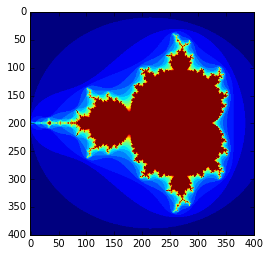

In [63]:
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much
    return divtime
plt.imshow(mandelbrot(400,400))
plt.show()

In [64]:
a = np.arange(12).reshape(3,4)
b1 = np.array([False,True,True])             # first dim selection
b2 = np.array([True,False,True,False])       # second dim selection

In [65]:
a[b1,:]                                   # selecting rows

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [66]:
a[b1]                                     # same thing

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [67]:
a[:,b2]                                   # selecting columns

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [68]:
a[b1,b2]                                  # a weird thing to do

array([ 4, 10])

In [69]:
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8,3])
ax,bx,cx = np.ix_(a,b,c)
ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [70]:
bx

array([[[8],
        [5],
        [4]]])

In [71]:
cx

array([[[5, 4, 6, 8, 3]]])

In [72]:
ax.shape, bx.shape, cx.shape

((4, 1, 1), (1, 3, 1), (1, 1, 5))

In [73]:
result = ax+bx*cx
result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])

In [74]:
result[3,2,4]

17

In [75]:
a[3]+b[2]*c[4]

17

In [76]:
def ufunc_reduce(ufct, *vectors):
    vs = np.ix_(*vectors)
    r = ufct.identity
    for v in vs:
        r = ufct(r,v)
    return r

In [77]:
ufunc_reduce(np.add,a,b,c)

array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],

       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],

       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],

       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]])

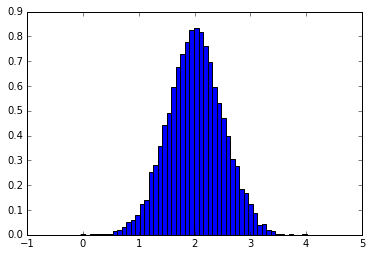

In [78]:
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = np.random.normal(mu,sigma,10000)
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, normed=1)       # matplotlib version (plot)
plt.show()

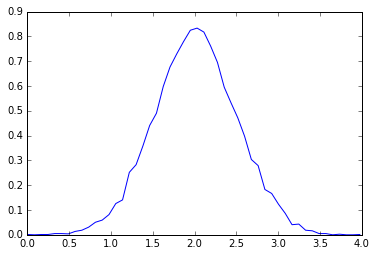

In [79]:
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, normed=True)  # NumPy version (no plot)
plt.plot(.5*(bins[1:]+bins[:-1]), n)
plt.show()

## Getfem++の学習
本節ではGetfem++のチュートリアル

http://download.gna.org/getfem/html/homepage/tutorial/index.html

の内容を解析します。

## Scipyの学習

本節ではScipyのチュートリアル

http://docs.scipy.org/doc/scipy/reference/tutorial/

の内容を解説します。

In [80]:
from scipy.sparse import csr_matrix
A = csr_matrix([[1, 2, 0], [0, 0, 3], [4, 0, 5]])
v = np.array([1, 0, -1])
A.dot(v)

array([ 1, -3, -1])

In [81]:
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
from numpy.linalg import solve, norm
from numpy.random import rand

In [82]:
A = lil_matrix((1000, 1000))
A[0, :100] = rand(100)
A[1, 100:200] = A[0, :100]
A.setdiag(rand(1000))

In [83]:
A = A.tocsr()
b = rand(1000)
x = spsolve(A, b)

In [84]:
x_ = solve(A.toarray(), b)

In [85]:
err = norm(x-x_)
err < 1e-10

True

In [86]:
from scipy import sparse
from numpy import array
I = array([0,3,1,0])
J = array([0,3,1,2])
V = array([4,5,7,9])
A = sparse.coo_matrix((V,(I,J)),shape=(4,4))
print A

  (0, 0)	4
  (3, 3)	5
  (1, 1)	7
  (0, 2)	9


In [87]:
I = array([0,0,1,3,1,0,0])
J = array([0,2,1,3,1,0,0])
V = array([1,1,1,1,1,1,1])
B = sparse.coo_matrix((V,(I,J)),shape=(4,4)).tocsr()
print B

  (0, 0)	3
  (0, 2)	1
  (1, 1)	2
  (3, 3)	1


In [88]:
G_dense = np.array([[0, 2, 1],
                    [2, 0, 0],
                    [1, 0, 1]])
G_masked = np.ma.masked_values(G_dense, 0)
from scipy.sparse import csr_matrix
G_sparse = csr_matrix(G_dense)
print G_sparse

  (0, 1)	2
  (0, 2)	1
  (1, 0)	2
  (2, 0)	1
  (2, 2)	1


In [89]:
from scipy.sparse import linalg

In [90]:
A = A.tocsc()

In [91]:
B = B.tocsc()

In [92]:
m = gf.Mesh?

In [ ]:
m = gf.Mesh

In [93]:
m = gf.Mesh('cartesian', np.arange(10))

In [94]:
print m


BEGIN POINTS LIST

  POINT  0  0
  POINT  1  1
  POINT  2  2
  POINT  3  3
  POINT  4  4
  POINT  5  5
  POINT  6  6
  POINT  7  7
  POINT  8  8
  POINT  9  9

END POINTS LIST



BEGIN MESH STRUCTURE DESCRIPTION

CONVEX 0    'GT_PK(1,1)'      0  1
CONVEX 1    'GT_PK(1,1)'      1  2
CONVEX 2    'GT_PK(1,1)'      2  3
CONVEX 3    'GT_PK(1,1)'      3  4
CONVEX 4    'GT_PK(1,1)'      4  5
CONVEX 5    'GT_PK(1,1)'      5  6
CONVEX 6    'GT_PK(1,1)'      6  7
CONVEX 7    'GT_PK(1,1)'      7  8
CONVEX 8    'GT_PK(1,1)'      8  9

END MESH STRUCTURE DESCRIPTION



In [95]:
mfu = gf.MeshFem(m)

In [96]:
print mfu


BEGIN MESH_FEM

QDIM 1
 BEGIN DOF_ENUMERATION 
 END DOF_ENUMERATION 
END MESH_FEM



In [97]:
mfu.set_fem(gf.Fem('FEM_PK(1,1)'))

In [98]:
print mfu


BEGIN MESH_FEM

QDIM 1
 CONVEX 0 'FEM_PK(1,1)'
 CONVEX 1 'FEM_PK(1,1)'
 CONVEX 2 'FEM_PK(1,1)'
 CONVEX 3 'FEM_PK(1,1)'
 CONVEX 4 'FEM_PK(1,1)'
 CONVEX 5 'FEM_PK(1,1)'
 CONVEX 6 'FEM_PK(1,1)'
 CONVEX 7 'FEM_PK(1,1)'
 CONVEX 8 'FEM_PK(1,1)'
 BEGIN DOF_ENUMERATION 
  0:  0 1
  1:  1 2
  2:  2 3
  3:  3 4
  4:  4 5
  5:  5 6
  6:  6 7
  7:  7 8
  8:  8 9
 END DOF_ENUMERATION 
END MESH_FEM

